## WGU BSDMDA Capstone Project
## Income Prediction for Nonprofit Donations
## Justin Edwards

## Organizational Need

After randomly sending nearly 32,000 letters to community members, nonprofit organization Sunshine Benevolence Fund discovered that every donation received was contributed by individuals earning an annual income exceeding \\$50,000. The organization needs a method that can effectively identify potential donors while minimizing the cost of outreach. This project compares supervised machine learning algorithms to create an accurate model capable of predicting whether an individual earns more than \\$50,000. The project also seeks to accept or reject the null hypothesis that predictive analytics cannot significantly improve the charity's ability to efficiently reach potential donors when compared to their current approach.        

----
## Data Preparation

In [1]:
import numpy as np
import pandas as pd
from time import time

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('census.csv')

data.sample(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
23774,53,Local-gov,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.0,0.0,50.0,United-States,>50K
11953,26,Private,Some-college,10.0,Married-civ-spouse,Prof-specialty,Wife,Asian-Pac-Islander,Female,0.0,0.0,40.0,United-States,<=50K
23019,30,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
44320,45,Private,HS-grad,9.0,Divorced,Other-service,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
35885,40,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
3428,37,Federal-gov,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,43.0,United-States,<=50K
13822,43,Federal-gov,Some-college,10.0,Widowed,Exec-managerial,Unmarried,Amer-Indian-Eskimo,Female,0.0,0.0,15.0,United-States,<=50K
36876,58,Self-emp-not-inc,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,2407.0,0.0,25.0,United-States,<=50K
25050,22,Private,HS-grad,9.0,Separated,Sales,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
36761,37,Federal-gov,HS-grad,9.0,Never-married,Adm-clerical,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [3]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [4]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [5]:
null_values = data.isnull().sum()

print(null_values)

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [6]:
n_records = data['age'].count()

n_greater_50k = data[data.income == '>50K'].income.count()

n_at_most_50k = data[data.income == '<=50K'].income.count()

greater_percent = round((float(n_greater_50k) * 100) / n_records, 2)

print("Total number of records: {:,d}".format(n_records))
print("Individuals making more than $50,000: {:,d}".format(n_greater_50k))
print("Individuals making at most $50,000: {:,d}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45,222
Individuals making more than $50,000: 11,208
Individuals making at most $50,000: 34,014
Percentage of individuals making more than $50,000: 24.78%


### Feature Set Exploration

** Features **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

** Target Variable **
* **income**: Income Class (<=50K, >50K)

----
## Data Preprocessing

### Transforming Skewed Continuous Features

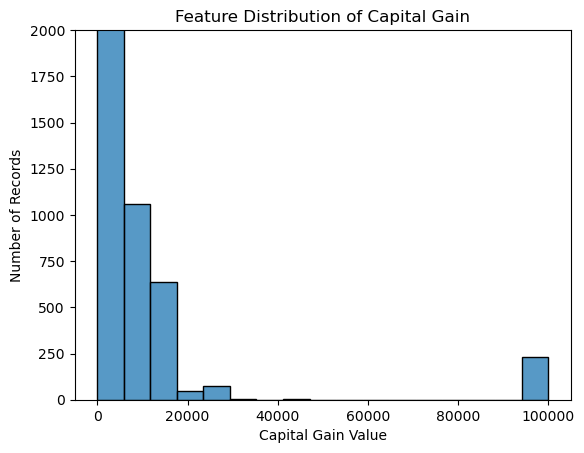

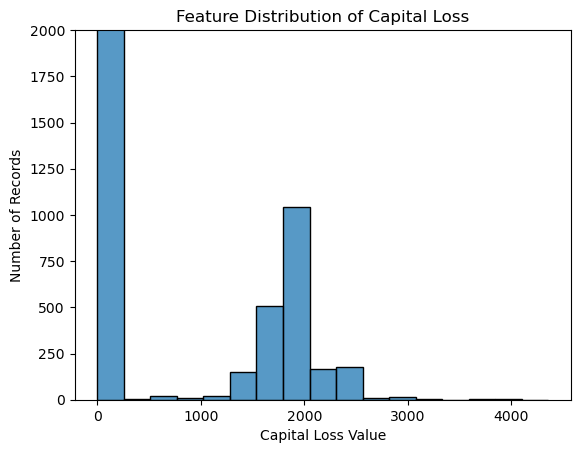

In [7]:
sns.histplot(data['capital-gain'], kde = False)
plt.xlabel('Capital Gain Value')
plt.ylabel('Number of Records')
plt.title('Feature Distribution of Capital Gain')
plt.ylim(0, 2000)
plt.show()

sns.histplot(data['capital-loss'], kde = False)
plt.xlabel('Capital Loss Value')
plt.ylabel('Number of Records')
plt.title('Feature Distribution of Capital Loss')
plt.ylim(0, 2000)
plt.show()

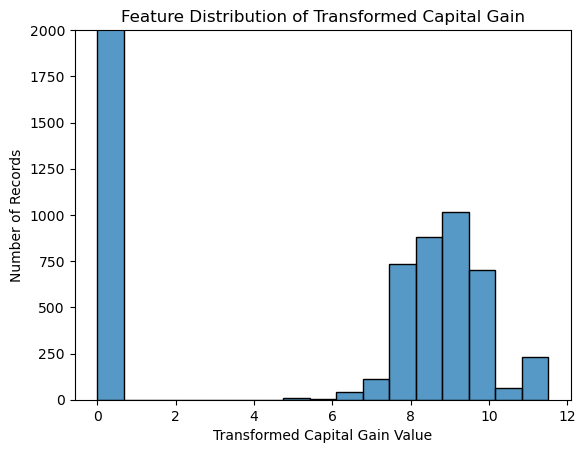

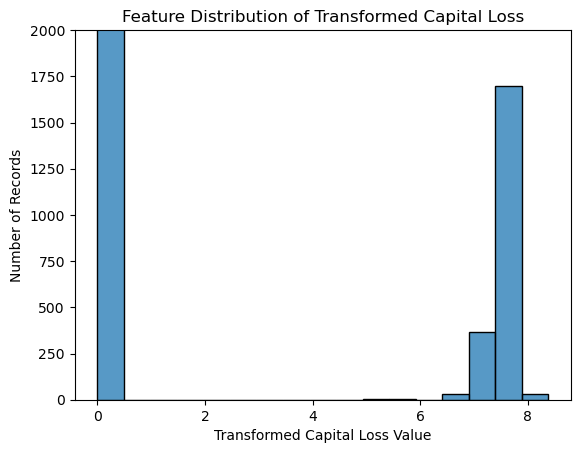

In [8]:
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

sns.histplot(features_log_transformed['capital-gain'], kde = False)
plt.xlabel('Transformed Capital Gain Value')
plt.ylabel('Number of Records')
plt.title('Feature Distribution of Transformed Capital Gain')
plt.ylim(0, 2000)
plt.show()

sns.histplot(features_log_transformed['capital-loss'], kde = False)
plt.xlabel('Transformed Capital Loss Value')
plt.ylabel('Number of Records')
plt.title('Feature Distribution of Transformed Capital Loss')
plt.ylim(0, 2000)
plt.show()

### Normalizing Numerical Features

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

features_log_minmax_transform.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [10]:
features_final = pd.get_dummies(features_log_minmax_transform)

income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

orig_feat = list(features_log_minmax_transform.columns)
encoded = list(features_final.columns)
print("{} total features before one-hot encoding.".format(len(features_log_minmax_transform.columns)))
print(orig_feat)
print("{} total features after one-hot encoding.".format(len(encoded)))
print(encoded)

13 total features before one-hot encoding.
['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_

----
## Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("Training set has {:,d} samples.".format(X_train.shape[0]))
print("Testing set has {:,d} samples.".format(X_test.shape[0]))

Training set has 36,177 samples.
Testing set has 9,045 samples.


----
## Naive Predictor

In [12]:
TP = np.sum(income) 
FP = income.count() - TP 

TN = 0 
FN = 0 

accuracy = ((TP + TN) / (TP + TN + FP + FN))
recall = (TP / (TP + FN))
precision = (TP / (TP + FP))

beta = 0.5
fscore = (1 + beta**2) * ((precision * recall) / ((beta**2 * precision) + recall))

print("Naive Predictor: [Accuracy score: {:.3f}, F-score: {:.3f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.248, F-score: 0.292]


----
## Evaluating Model Performance

**Gaussian Naive Bayes:**

- *Real-world application*
    - As it has good results in multi-class problems and independence rule, Naive Bayes has a high success rate in text classification. This has led to it being regularly used in email spam filtering applications
- *Advantages*
    - Quick to predict classes of test data
    - Good results in multi-class problems and independence rule
    - Typically requires less training data than other models
    - Performs well with categorical input variables
    - Performs well with a large dataset
    - Performs well with a small training set
- *Limitations*
    - Assumes independent predictors
    - When a categorical variable in the test dataset contains a category that was not present in the training dataset, the model will assign a probability of 0 and consequently be unable to generate a prediction
    - Performs poorly as an estimator 
- *Appropriateness for the dataset*
    - Dataset is clean and appropriately sized (50 < sample size < 100k)
    - Works well with classification
    - Data is labeled

**AdaBoost Classifier:**

- *Real-world application*
    - Used in industries for binary classification tasks related to detecting faces, where it must determine whether a given portion of an image pertains to a face or background
- *Advantages*
    - Compared to other algorithms, it is simpler to operate and requires fewer parameter adjustments
    - While there is no solid proof, AdaBoost is theoretically not susceptible to overfitting
    - Assigns higher significance to instances that are challenging to classify, while reducing the importance of those that have already been effectively addressed
    - Performs well on top of weak learners to deliver a more accurate model
- *Limitations*
    - Highly susceptible to noisy data and outliers
    - Performs poorly with subpar data quality
- *Appropriateness for the dataset*
    - Dataset is clean and appropriately sized (50 < sample size < 100k)
    - Data is labeled and suitable for binary classification

**Logistic Regression:**

- *Real-world application*
    - Fraud detection in financial transactions
- *Advantages*
    - Fast training and prediction times
    - Interpretable model, as it provides coefficient values for each feature
    - Works well with binary classification problems
- *Limitations*
    - Assumes a linear relationship between features and the log-odds of the target variable
    - Prone to underperform if the dataset has high dimensionality or complex relationships
    - Sensitive to outliers and multicollinearity among features
- *Appropriateness for the dataset*
    - Dataset is clean and appropriately sized (50 < sample size < 100k)
    - The problem does not require capturing complex interactions among features
    - Logistic regression can provide interpretable insights into the impact of features on the target variable
    - Data is labeled and suitable for binary classification

### Training and Predicting Pipeline

In [13]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time()
    learner =  learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() 
    
    results['train_time'] = end - start
        
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() 
    
    results['pred_time'] = end - start
            
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    results['f_train'] = fbeta_score(y_train[:300], predictions_train[:300], beta = 0.5)
        
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)
       
    print("{} trained on {:,d} samples.".format(learner.__class__.__name__, sample_size))
        
    return results

### Initial Model Evaluation

GaussianNB trained on 361 samples.
GaussianNB trained on 3,617 samples.
GaussianNB trained on 36,177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3,617 samples.
AdaBoostClassifier trained on 36,177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3,617 samples.
LogisticRegression trained on 36,177 samples.


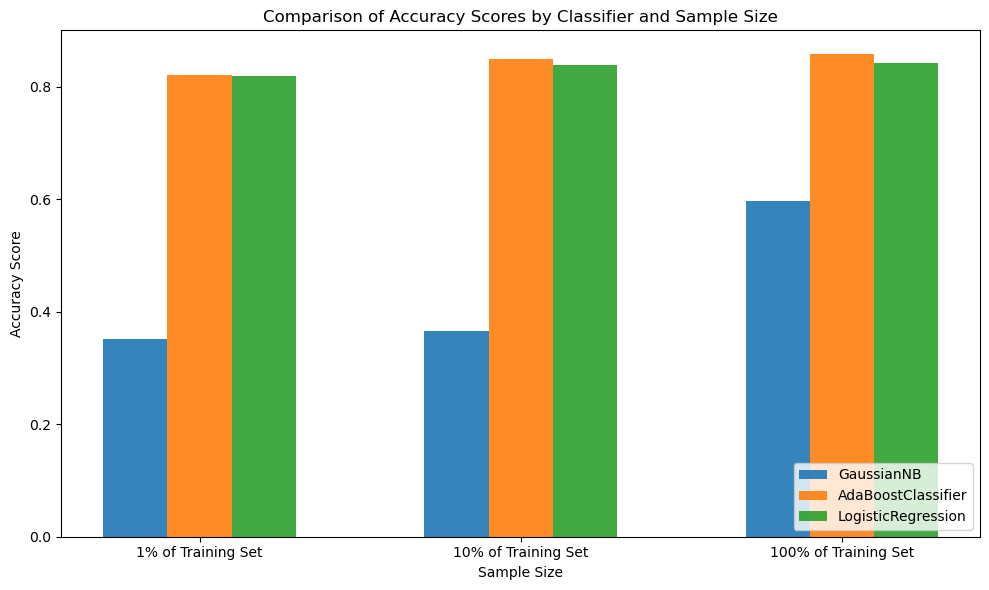

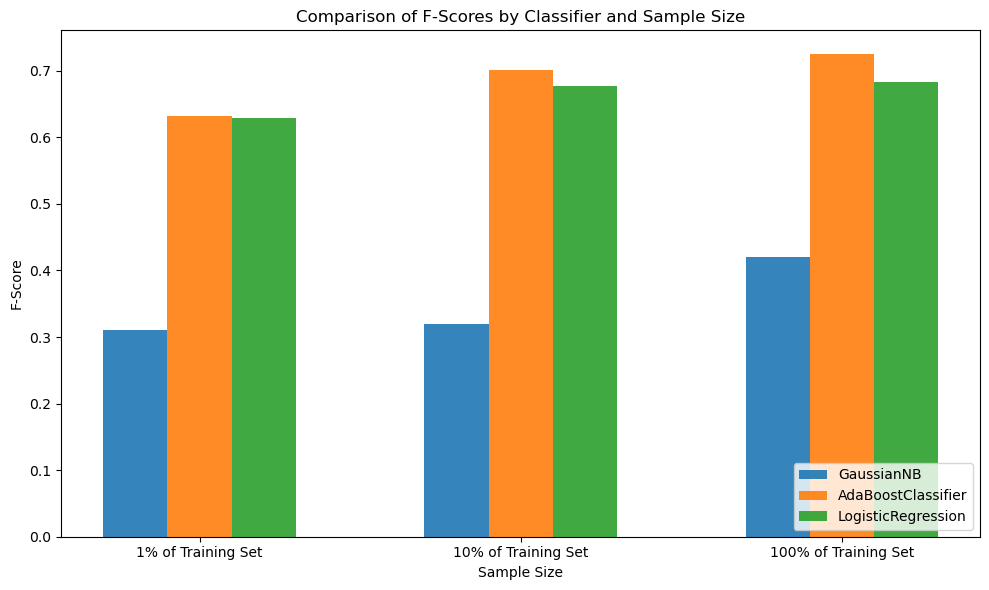

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

clf_A = GaussianNB()
clf_B = AdaBoostClassifier(random_state = 42)
clf_C = LogisticRegression(random_state = 42, max_iter = 1000, solver = 'liblinear')

samples_100 = len(y_train)
samples_10 = int(samples_100 * 0.1)
samples_1 = int(samples_100 * 0.01)

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

classifiers = list(results.keys())
sample_sizes = ['1% of Training Set', '10% of Training Set', '100% of Training Set']
accuracy_scores = [[results[classifier][i]['acc_test'] for i in range(3)] for classifier in classifiers]
fscores = [[results[classifier][i]['f_test'] for i in range(3)] for classifier in classifiers]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
opacity = 0.9
index = np.arange(len(sample_sizes))

for i, classifier in enumerate(classifiers):
    plt.bar(index + i * bar_width, accuracy_scores[i], bar_width, alpha = opacity, label = classifier)

plt.xlabel('Sample Size')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores by Classifier and Sample Size')
plt.xticks(index + bar_width, sample_sizes)
plt.legend(loc = 'lower right', bbox_to_anchor = (1, 0))
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize = (10, 6))
bar_width = 0.2
opacity = 0.9
index = np.arange(len(sample_sizes))

for i, classifier in enumerate(classifiers):
    plt.bar(index + i * bar_width, fscores[i], bar_width, alpha = opacity, label = classifier)

plt.xlabel('Sample Size')
plt.ylabel('F-Score')
plt.title('Comparison of F-Scores by Classifier and Sample Size')
plt.xticks(index + bar_width, sample_sizes)
plt.legend(loc = 'lower right', bbox_to_anchor = (1, 0))
plt.tight_layout()
plt.show()

----
## Model Selection and Hyperparameter Tuning

### Model Selection

AdaBoost outperforms Naive Bayes and Logistic Regression models in terms of testing accuracy and F-score at all training set sizes. When 100\% of the training data is used, AdaBoost's F-score approaches 0.8, Logistic Regression is just below 0.7, and Naive Bayes lags behind with a score of around 0.4.

The AdaBoost model is a more than suitable candidate for this dataset. The model training time should not be an issue with this particular dataset, as it appears to contain high quality data. The dataset is also appropriately sized with a sample size larger than 50 but less than 100,000. In addition, the AdaBoost model works well with binary classification problems. Finally, since the data is labeled, the dataset meets all of the main criteria required for the implementation of the AdaBoost classifier.

### Describing the Model in Layman's Terms

AdaBoost, short for Adaptive Boosting, is a machine learning algorithm used for classification problems. AdaBoost is a machine learning technique used for classification tasks that involves combining several "weak" classifiers (models that are only slightly better than random guessing) to create a more accurate "strong" classifier. 

To do this, AdaBoost trains a series of weak classifiers on different subsets of the data, with each classifier giving more weight to the samples that the previous weak model got wrong. The weight of each weak classifier is determined by its accuracy, and the collective predictions of all weak classifiers, each with their own weight, are used to make the final prediction. This technique allows AdaBoost to assign greater importance to the classifiers that perform well on the training data, and lower importance to those that perform poorly, leading to a strong classifier that can accurately classify new, unseen data. 

In short, AdaBoost is a powerful and flexible algorithm that can be used to improve the accuracy of a wide range of machine learning models. It is particularly useful when dealing with large and complex datasets, where other algorithms may struggle to make accurate predictions.

### Hyperparameter Tuning

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

clf = AdaBoostClassifier(random_state = 42)

parameters = {'n_estimators': [50, 150, 450], 'learning_rate': [1.0, 1.5, 2.0]}

scorer = make_scorer(fbeta_score, beta = 0.5)

grid_obj = GridSearchCV(clf, parameters, scoring = scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.3f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.3f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.3f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.3f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.858
F-score on testing data: 0.725

Optimized Model
------
Final accuracy score on the testing data: 0.868
Final F-score on the testing data: 0.746


### Final Model Evaluation

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |        0.858           |         0.868        |
| F-score        |          0.725         |   0.746       |

The optimized model's accuracy on the testing data is 0.868, while its F-score is 0.746. These scores are slightly better than those of the unoptimized model's accuracy and F-score values of 0.858 and 0.725, respectively. However, compared to the previously found naive predictor accuracy (0.248) and F-score (0.292) benchmarks, the results of the optimized model are a significant improvement. Since the naive predictor scores were set as the baseline for comparison in this project, I consider this a huge success.

----
## Feature Importance

The following features, in order, are what I believe to be the most important for predicting individual income to be at most or more than $50,000:

1. ****Occupation:**** Job salaries are standardized to a certain degree, and often a reliable predictor of income. For instance, practicing doctors seldom make less than \$50,000 annually. 
2. ****Education num:**** Though not always the case, those with advanced degrees typically have higher income than those who did not pursue higher education.
3. ****Age:**** It is often the case that income and overall assets increase with age until retirement.
4. ****Hours-per-week:**** Those who work more hours typically have higher income. This isn't always the case, of course, but it is far less common for people to make over $50,000 working a part-time schedule than it is for those who work 40+ hours every week.
5. ****Capital-gain:****  I am assuming that capital gains are independent of income, but could still be an indicator of someone who makes sound investments.

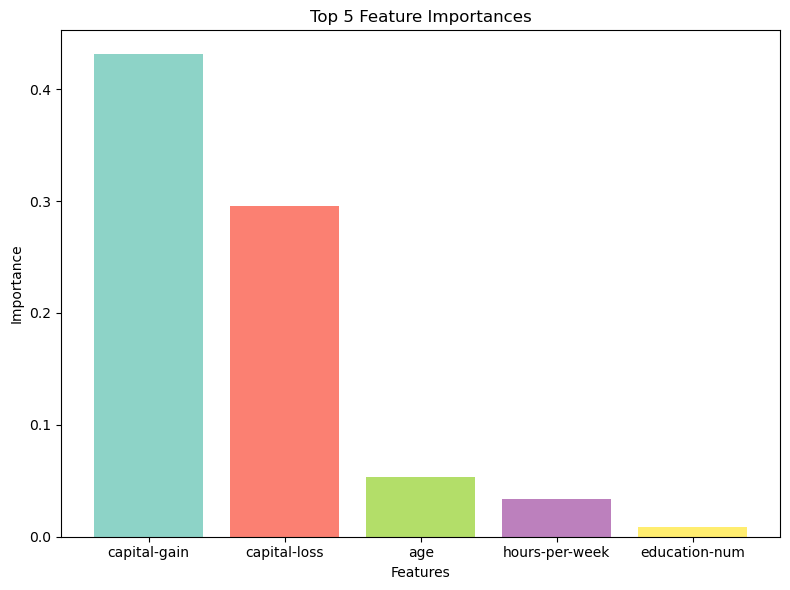

In [16]:
model = AdaBoostClassifier(random_state = 42, n_estimators = 450).fit(X_train, y_train)

importances = model.feature_importances_

color_palette = plt.cm.get_cmap('Set3', 5)

sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]

top_feature_indices = sorted_indices[:5]
top_feature_titles = X_train.columns[top_feature_indices]

plt.figure(figsize = (8, 6))
plt.bar(range(5), sorted_importances[:5], align = 'center', tick_label = top_feature_titles, color = color_palette(range(5)))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Feature Importances')
plt.tight_layout()
plt.show()

Upon observing the above visualization, I immediately noticed that compared to my top five list of the most important features, it is different but not too far off. In fact, I got "age" and "hours-per-week" exactly right at numbers 3 and 4, respectively. The level of education is fifth according to the visualization, but I had it at number 2. I had "capital gain" rounding out my top 5 list, but I certainly didn't expect it to be the top feature. In hindsight, perhaps these features are more relevant because seeing that an individual has massive or minimal gains/losses would make it easier to categorize that person by income level.

----
## Model Evaluation with Reduced Features

In [17]:
from sklearn.base import clone

X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

clf = (clone(best_clf)).fit(X_train_reduced, y_train)

reduced_predictions = clf.predict(X_test_reduced)

print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.3f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.3f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.3f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.3f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.868
F-score on testing data: 0.746

Final Model trained on reduced data
------
Accuracy on testing data: 0.842
F-score on testing data: 0.699


### Effects of Feature Selection

- When using only five features of the data, the final model's F-score and accuracy score are both lower than the same scores when all features are used. The testing data accuracy dropped from 0.868 to 0.842, a 3% decrease. The testing data F-score difference was more noticeable, dropping from 0.746 to 0.699. This was a 6.3% decrease in score. 

- When faced with the decision to use the reduced data as my training set *if training time was a factor*, I would likely weigh each option with thorough consideration, but ultimately use the reduced data. A 3% drop in accuracy and 6.3% reduction in F-score is a fair trade-off for what is very likely far more than a 6.3% reduction in time. This is especially true considering the accuracy score of 0.842 is still an excellent result when considering we removed well over half of the features in the dataset.

----
## Hypothesis Testing

In [18]:
from scipy.stats import ttest_rel

final_model_accuracy = accuracy_score(y_test, best_predictions)
naive_predictor_accuracy = accuracy_score(y_test, np.ones(len(y_test)))

t_statistic, p_value = ttest_rel(best_predictions, np.ones(len(y_test)))

alpha = 0.05

if p_value < alpha:
    print("The final AdaBoost model significantly outperforms the naive predictor.")
else:
    print("The final AdaBoost model does not significantly outperform the naive predictor.")
    
print("Final Model Accuracy: {:.3f}".format(final_model_accuracy))
print("Naive Predictor Accuracy: {:.3f}".format(naive_predictor_accuracy))
print("T-Statistic: {:.2f}".format(t_statistic))
print("P-Value: {:.2f}".format(p_value))

The final AdaBoost model significantly outperforms the naive predictor.
Final Model Accuracy: 0.868
Naive Predictor Accuracy: 0.244
T-Statistic: -189.68
P-Value: 0.00


----
## Statistical Significance Visualization

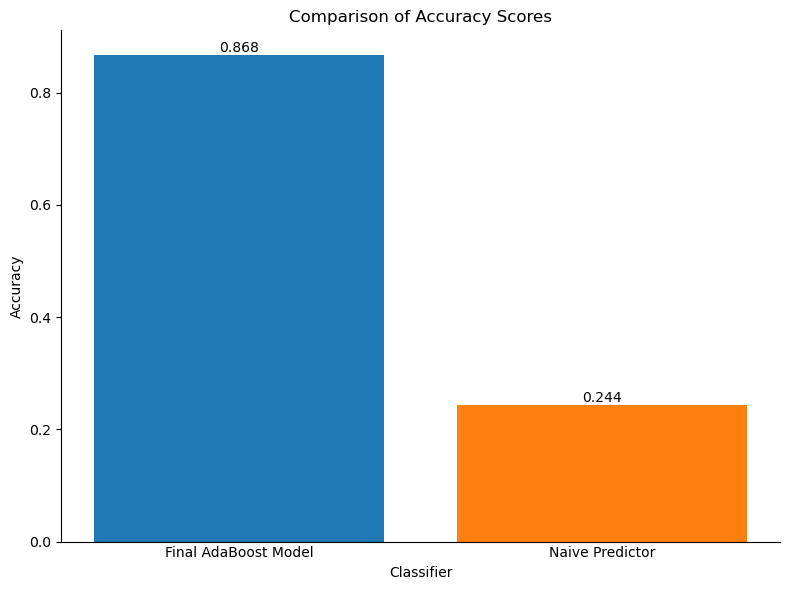

In [19]:
labels = ['Final AdaBoost Model', 'Naive Predictor']
accuracy_scores = [final_model_accuracy, naive_predictor_accuracy]

colors = ['#1f77b4', '#ff7f0e']

fig, ax = plt.subplots(figsize = (8, 6))

ax.bar(labels, accuracy_scores, color = colors)

for i, v in enumerate(accuracy_scores):
    ax.text(i, v, str(round(v, 3)), ha = 'center', va = 'bottom')

ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracy Scores')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis = 'x', length = 0)

plt.tight_layout()

plt.show()

----
## Sources:

Pieces of this code were extracted from an ipynb file that can be found at the following GitHub repository: https://github.com/udacity/DSND_Term1/tree/master/projects/p1_charityml

UDACITY. (2021). CharityML Project Repository. GitHub. Retrieved from: github.com/udacity/DSND_Term1/tree/master/projects/p1_charityml